# Group5 - Taco Bell's Diet Problem Project

**Group member name:**

Ce Zhuang\
Shuyao Chen\
Simeng Deng\
Yingxiao Zhu\
Zihao Yan

## **1. Setup Environment/Imports**

In [ ]:
 # import modules
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("glpsol") or os.path.isfile("glpsol")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("glpsol") or os.path.isfile("glpsol"))

from pyomo.environ import *

SOLVER = 'glpk'
EXECUTABLE = '/usr/bin/glpsol'

     |████████████████████████████████| 9.4MB 1.6MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 256kB 32.6MB/s 
     |████████████████████████████████| 163kB 48.0MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-

## **2. Problem Description:**

Having a healthy eating lifestyle is one of the important steps for people to stay healthy. Among varieties of eating lifestyles, a balanced diet helps avoid obesity and various diseases that make up metabolic syndrome and maintain a healthy body weight. 

Keeping a balanced diet requires people to intake enough nutrients that are essential for the body to function correctly. According to the Dietary Guidelines for Americans, essential nutrients include vitamins, minerals, antioxidants, carbohydrates, protein and healthy fats. The amount of these nutrients to consume per day is also defined based on study of average healthy people. [1]

For a 20 years old light active Female college student with 55 kilograms weight & 165 cm tall, what should be eaten on a daily basis among the 196 foods of Taco Bell, so that the woman’s intake of five nutrients will be sufficient and appropriate to keep a balanced diet? 



### **2.1 Our Problem:**

* Input: We use the dataset [Taco Bell Nutrition Facts & Calorie Information](https://www.nutrition-charts.com/taco-bell-nutrition-facts-calorie-information/) from Nutrition Charts website to create a diet. The columns are indicated as follows: 
  * The 196 products that Taco Bell provides.
  * Nutritient intake of Calories(cal), Protein (g), Total Carbs (g), Sodium (mg), and Sugars (g) for a particular product. Other nutrients such as vitamins and minerals are not stated due to lack of data.
  * [Weight Watcher Points](https://www.wikihow.com/Calculate-Your-Weight-Watchers-Points). Weight Watchers Points are popularly applied when someone wants to develop a healthy diet flexibly.
* Objective: Ensure enough and appropriate intake of nutrients, minimize Weight Watcher Points of one person a day and diversify the food choices.


*   Constraints: 

  *   **Calories** : The amount of calories intake for a person depends on the age, size, height, lifestyle, overall health, and activity level. In this case,  a 20 years old light active Female college student with 55 kilograms weight & 165 cm tall should intake at least 1815 cal per day.[2]  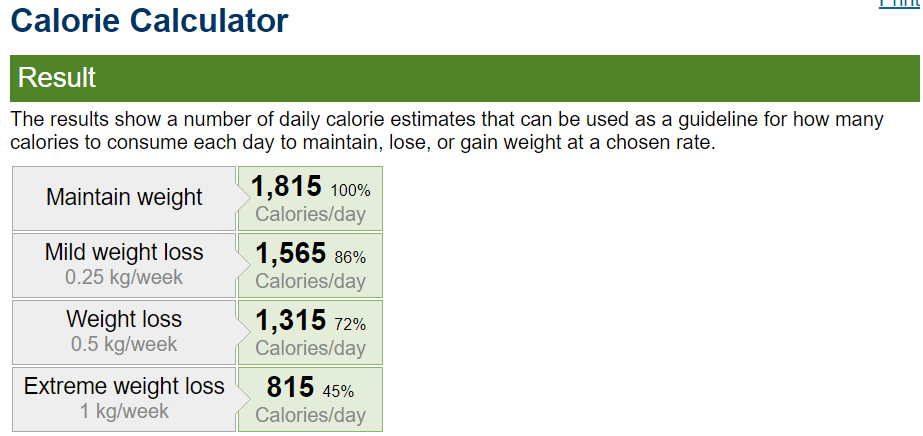
  
  *  **Protein** : According to Chinese Nutrition Society, daily protein intake for an adult woman should be larger than 55 grams per day.[3] Chinese Dietary Guidelines 2016 mentioned that to intake sufficient protein, people can eay 280-350 g eggs per week, because eggs contain " a wide variety and high amounts of nutrients." [4]
   *   **Total Carbs**：Carbohydrates are human body's main source of energy. According to official Dietary Reference Intakes (DRIs), a healthy adult should intake at least 130 g carbs to produce enough glucose for the brain to function. [5]
   *   **Sodium**：According to the Dietary Guidelines for Americans, people having diets with higher level of sodium are more likely to develop high blood pressure, which is a major cause of stroke and heart disease. Thus, it is better to intake less than 2,300 milligrams (mg) for one person per day.[6]
   *   **Sugars**：Excess intake of sugar may lead to unhealthy weight gain, dental caries and even secondary diseases. WHO recommends reducing free sugar intake at all stages of life to under 10 percent of physical calories, which equals to a maximun of 50 g of sugar per day for the average adult.[7]
  
### **Sample Data:**

Products	| Calories	| Protein(g)	| Total Carbs (g)	| Sodium (mg)	| Sugars (g) | Weight Watchers
--- | --- |  --- | --- | --- | --- | ---
Cherry Limeade Sparkler	|180	|0	|44	|105	|43 |5	
Cherry Limeade Sparkler	|270	|0	|66	|160	|65 |7	
Classic Limeade Sparkler	|230	|0	|60	|125	|59 |7	
...	|...	|...	|...	|...	|...	|...
Crispy Potato Soft Taco	|250	|6	|29	|490	|1	|7
Crunchy Taco	|170	|8	|12	|310	|1	|5
Soft Taco-Beef	|190	|9	|18	|500	|1 |5	


### **2.2 Our Approach:**

We first create a general model from all of the 196 products and to see what's the draft recommendation of pyomo would give us. Based on the first model's constraints, we will divide the nutritient proportionally in order to allocate them in three meals a day. To gurantee the variety food intake, each kind of food appears only once in the each meal.

### **2.3 Define the Objective Function:**

$Min(WWP) = 5CLS1+7CLS2+7CLS3+...+7CPST+5CT+5STB$ `Ojbective Function`

### **2.4 Write the Constraints**

subject to:

* $180CLS1 + 270CLS2 + 230CLS3 +...+ 250CPST + 170CT + 190STB \geq 1815$   `(Calories)`
* $0CLS1 + 0CLS2 + 0CLS3 +...+ 6CPST + 8CT + 9STB \geq 55$  `(Protein)`
* $44CLS1 + 66CLS2 + 60CLS3 +...+ 29CPST + 12CT + 18STB \geq 130$ `(Total Carbs)`
* $105CLS1 + 160CLS2 + 125CLS3 +...+ 490CPST + 310CT + 500STB \leq 2300$ `(Sodium)`
* $43CLS1 + 65CLS2 + 59CLS3 +...+ 1CPST + 1CT + 1STB \leq 50$ `(Sugars)`

* $CLS1, CLS2, CLS3,..., CPST, CT, STB \in \mathbb{N}^+$ `(Domains)`

## **3. Data Preparation**

### **3.1 Reading File**

Now we will see how to read the data from an Excel file. You can download the file [here]

In [ ]:
# Read data from Excel file
from google.colab import files
# Command to upload file
uploaded = files.upload()

Saving Tacobell.xlsx to Tacobell.xlsx


### **3.2 Extracting Data from the File**

In [ ]:
import pandas as pd
import io

# Transform excel file in a pandas dataframe
df = pd.read_excel('Tacobell.xlsx') 
print(df)

                               Food  Weight_Watchers  ...  Sodium (mg)  Sugars (g)
0           Cherry Limeade Sparkler              5.0  ...          105          43
1           Cherry Limeade Sparkler              7.0  ...          160          65
2          Classic Limeade Sparkler              7.0  ...          125          59
3    Classic Limeade Sparkler 16 oz              4.0  ...           80          38
4        Mtn Dew® Baja Blast Freeze              7.0  ...           75          58
..                              ...              ...  ...          ...         ...
192                 Cinnamon Twists              5.0  ...          200          10
193         Crispy Potato Soft Taco              7.0  ...          490           1
194                    Crunchy Taco              5.0  ...          310           1
195                  Soft Taco-Beef              5.0  ...          500           1
196                     Constraints              NaN  ...         2300          50

[19

In [ ]:
# List of product indices - last item is not a product!
products = df.index.values.tolist()[:-1]
print("products",products)

products [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195]


In [ ]:
# Extract list of foods, use transpose operation, and create dictionary index->food name
product_name =  df["Food"].T.to_dict()
print(product_name)

{0: 'Cherry Limeade Sparkler', 1: 'Cherry Limeade Sparkler', 2: 'Classic Limeade Sparkler', 3: 'Classic Limeade Sparkler 16 oz', 4: 'Mtn Dew® Baja Blast Freeze', 5: 'Mtn Dew® Baja Blast Freeze 16 oz', 6: 'Orange Juice', 7: 'Pink Lemonade Freeze', 8: 'Pink Lemonade Freeze 16 oz', 9: 'Piña Colada Freeze', 10: 'Piña Colada Freeze 16oz', 11: 'Diet Pepsi 16 oz', 12: 'Diet Pepsi 20 oz', 13: 'Diet Pepsi 30 oz', 14: 'Diet Pepsi 40 oz', 15: 'Dr Pepper 16 oz', 16: 'Dr Pepper 20 oz', 17: 'Dr Pepper 30 oz', 18: 'Dr Pepper 40 oz', 19: 'Lipton Raspberry Iced Tea 16 oz', 20: 'Lipton Raspberry Iced Tea 20 oz', 21: 'Lipton Raspberry Iced Tea 30 oz', 22: 'Lipton Raspberry Iced Tea 40 oz', 23: 'MTN DEW A.M. 16 oz', 24: 'MTN DEW A.M. 20 oz', 25: 'MUG Root Beer 16 oz', 26: 'MUG Root Beer 20 oz', 27: 'MUG Root Beer 30 oz', 28: 'MUG Root Beer 40 oz', 29: 'Mountain Dew 16 oz', 30: 'Mountain Dew 20 oz', 31: 'Mountain Dew 30 oz', 32: 'Mountain Dew 40 oz', 33: 'Mountain Dew Baja Blast 16 oz', 34: 'Mountain Dew B

In [ ]:
# The command below gives us the list of column names
print(list(df))

['Food', 'Weight_Watchers', 'Calories', 'Protein (g)', 'Total Carbs (g)', 'Sodium (mg)', 'Sugars (g)']


In [ ]:
# List of nutrients - Remove first 2 elements, as they are not nutrients!
nutrients = list(df)[2:]
print("nutrients",nutrients)

nutrients ['Calories', 'Protein (g)', 'Total Carbs (g)', 'Sodium (mg)', 'Sugars (g)']


In [ ]:
# Extract columns with values, transform column in list, and remove last row
Weight_Watchers = df["Weight_Watchers"].tolist()[:-1]
print("Weight Watchers",Weight_Watchers)

Weight Watchers [5.0, 7.0, 7.0, 4.0, 7.0, 6.0, 4.0, 7.0, 6.0, 7.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 7.0, 11.0, 15.0, 5.0, 6.0, 9.0, 11.0, 5.0, 5.0, 6.0, 7.0, 11.0, 14.0, 6.0, 8.0, 12.0, 16.0, 6.0, 8.0, 12.0, 16.0, 6.0, 8.0, 11.0, 15.0, 6.0, 7.0, 11.0, 15.0, 7.0, 8.0, 12.0, 16.0, 6.0, 7.0, 11.0, 15.0, 18.0, 19.0, 12.0, 6.0, 7.0, 2.0, 4.0, 4.0, 12.0, 6.0, 10.0, 5.0, 5.0, 12.0, 12.0, 11.0, 14.0, 11.0, 11.0, 11.0, 12.0, 20.0, 21.0, 20.0, 14.0, 11.0, 10.0, 13.0, 12.0, 19.0, 18.0, 18.0, 10.0, 21.0, 24.0, 23.0, 23.0, 14.0, 15.0, 14.0, 20.0, 21.0, 20.0, 26.0, 9.0, 10.0, 10.0, 2.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 9.0, 10.0, 4.0, 4.0, 4.0, 5.0, 14.0, 7.0, 8.0, 8.0, 8.0, 9.0, 22.0, 13.0, 28.0, 2.0, 5.0, 11.0, 8.0, 8.0, 8.0, 9.0, 6.0, 5.0, 5.0, 5.0, 3.0, 18.0, 19.0, 6.0, 11.0, 14.0, 15.0, 14.0, 26.0, 13.0, 5.0, 14.0, 10.0, 14.0, 16.0, 13.0, 7.0, 15.0, 6.0, 19.0, 18.0, 18.0, 10.0, 14.0, 8.0, 16.0, 22.0, 20.0, 20.0, 4.0, 5.0, 6.0, 7.0, 5.0, 6.0, 10.0, 9.0, 5.0, 6.0

In [ ]:
# Extract nutritional values and remove last element
nut_value = dict()
for nutrient in nutrients:
  nut_value[nutrient] = df[nutrient].tolist()[:-1]

In [ ]:
# Extract constraints from cell
Constraints = df.loc[196]
print(Constraints)

Food               Constraints
Weight_Watchers            NaN
Calories                  1815
Protein (g)                 55
Total Carbs (g)            130
Sodium (mg)               2300
Sugars (g)                  50
Name: 196, dtype: object


## **4. Build the First Model**

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables
model.volume = Var(products,domain=NonNegativeIntegers) # set the variable as positive integers.

# declare objective
obj_expr = 0
for product in products:
  obj_expr += Weight_Watchers[product]*model.volume[product]
model.Weight = Objective(
                      expr = obj_expr,
                      sense = minimize)

In [ ]:
# Extract nutrients from the dataframe
Calories = df["Calories"].tolist()[:-1]
Proteins = df["Protein (g)"].tolist()[:-1]
Carbs = df["Total Carbs (g)"].tolist()[:-1]
Sugars = df["Sugars (g)"].tolist()[:-1]
Sodiums = df["Sodium (mg)"].tolist()[:-1]

In [ ]:
# declare constraints
model.constraints = ConstraintList()

for nutrient in nutrients:
  Calories_value = 0
  Proteins_value = 0
  Carbs_value = 0
  Sodiums_value = 0
  Sugars_value = 0
  for product in products:
    Calories_value += Calories[product]*model.volume[product]
    Proteins_value += Proteins[product]*model.volume[product]
    Carbs_value += Carbs[product]*model.volume[product]
    Sodiums_value += Sodiums[product]*model.volume[product]
    Sugars_value += Sugars[product]*model.volume[product]
  model.constraints.add(expr = Calories_value >= 1815)
  model.constraints.add(expr = Proteins_value >= 55)
  model.constraints.add(expr = Carbs_value >= 130)
  model.constraints.add(expr = Sodiums_value <= 2300)
  model.constraints.add(expr = Sugars_value <= 50)

# show the model you've created
model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   25 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
    volume_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  196 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 14

In [ ]:
# solve it
SolverFactory(SOLVER, executable=EXECUTABLE).solve(model).write()
# show the results
print("Weight Watchers = ", model.Weight())

for product in products:
  print(product_name[product],model.volume[product]())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 48.0
  Upper bound: 48.0
  Number of objectives: 1
  Number of constraints: 26
  Number of variables: 197
  Number of nonzeros: 4436
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 125
      Number of created subproblems: 125
  Error rc: 0
  Time: 0.050083160400390625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------

In [ ]:
# The output of the model
# extract the result of volume
volume_data = {(volume):value(v) for (volume), v in model.volume.items()}
tempdata = pd.DataFrame.from_dict(volume_data, orient="index", columns=["volume"])

# combine the volume column with original dataset and remove food with 0 volume
result = df.merge(tempdata,how='inner',left_index=True,right_index=True)
result = result[result.volume != 0]

# Update the total number based on volume 
result['Weight_Watchers'] = result['volume']*result['Weight_Watchers']
result['Calories'] = result['volume']*result['Calories']
result['Protein (g)'] = result['volume']*result['Protein (g)']
result['Total Carbs (g)'] = result['volume']*result['Total Carbs (g)']
result['Sodium (mg)'] = result['volume']*result['Sodium (mg)']
result['Sugars (g)'] = result['volume']*result['Sugars (g)']
result.loc['sum'] = result.sum()
result

,Food,Weight_Watchers,Calories,Protein (g),Total Carbs (g),Sodium (mg),Sugars (g),volume
57,Cinnabon Delights – 4 Pack,14.0,520.0,6.0,56.0,260.0,32.0,2.0
97,Chalupa Supreme® – Chicken,27.0,1020.0,48.0,87.0,1590.0,12.0,3.0
100,Avocado Ranch Dressing,6.0,240.0,0.0,3.0,300.0,0.0,3.0
109,Pico de Gallo,0.0,15.0,0.0,3.0,105.0,3.0,3.0
112,Reduced Fat Sour Cream,1.0,30.0,1.0,2.0,20.0,1.0,1.0
sum,Cinnabon Delights – 4 PackChalupa Supreme® – C...,48.0,1825.0,55.0,151.0,2275.0,48.0,12.0




1.   LHS of Calories is 1825 cal

     RHS of Calories is 1815 cal

2.   LHS of Proteins is 55 g

     RHS of Proteins is 55 g[**Binding**]

3.   LHS of Carbs is 151 g

     RHS of Carbs is 130 g

4.   LHS of Sodium is 2275 g

     RHS of Sodium is 2300 g

5.   LHS of Sugars is 48 g 

     RHS of Sugars is 50 g 

### **Menu from our First Model**
**Weight Watcher = 48**

**Cinnabon Delights 4 Pack: 2**

**Chalupa Supreme - Chicken: 3**

**Avocado Ranch Dressing: 3**

**Pico de Gallo: 3**

**Reduced Fat Sour Cream: 1**

It doesn't look good because there is too much repetitive food. We need to refine a little bit to diversify food choices. Therefore, we try to allocate the different food to breakfast, lunch, and dinner for one day.

## **5.Second Model**

Based on the first model, we add two important assumptions for the second model to make the result accord with human nature.

*   The first assumption is the porportion of energy distributied to 3 meals. With the old saying, "have a good breakfast, a full lunch, and a light supper", we should take proportion of meals into consideration (Three meals a Day, 2000).[8] Thus, as for our second model, we proportionate our nutrition constraints to three meal of a day as 35% breakfast, 40% lunch, and 25% dinner.

*   The second assumption is food variety. Studies show that people who eat a wide variety of food are healthier, live longer and have reduced risk of developing lifestyle illness such as heart disease, cancer and diabetes.[9] 


### **5.1 Breakfast**

In [ ]:
# declare the breakfast model 
model = ConcreteModel()

# declare decision variables
model.volume = Var(products,domain=NonNegativeIntegers, bounds=(0,1)) # set the product amount as positive integers and limit them to 1

# declare objective
obj_expr = 0
for product in products:
  obj_expr += Weight_Watchers[product]*model.volume[product]
model.Weight = Objective(
                      expr = obj_expr,
                      sense = minimize)

In [ ]:
# Extract nutrients from the dataframe
Calories = df["Calories"].tolist()[:-1]
Proteins = df["Protein (g)"].tolist()[:-1]
Carbs = df["Total Carbs (g)"].tolist()[:-1]
Sugars = df["Sugars (g)"].tolist()[:-1]
Sodiums = df["Sodium (mg)"].tolist()[:-1]

In [ ]:
# declare constraints
model.constraints = ConstraintList()

for nutrient in nutrients:
  Calories_value = 0
  Proteins_value = 0
  Carbs_value = 0
  Sodiums_value = 0
  Sugars_value = 0
  for product in products:
    Calories_value += Calories[product]*model.volume[product]
    Proteins_value += Proteins[product]*model.volume[product]
    Carbs_value += Carbs[product]*model.volume[product]
    Sodiums_value += Sodiums[product]*model.volume[product]
    Sugars_value += Sugars[product]*model.volume[product]
  model.constraints.add(expr = Calories_value >= 635.25) # 1815 * 0.35
  model.constraints.add(expr = Proteins_value >= 19.25) # 55 * 0.35
  model.constraints.add(expr = Carbs_value >= 45.5) # 130 * 0.35
  model.constraints.add(expr = Sodiums_value <= 805) # 2300 * 0.35
  model.constraints.add(expr = Sugars_value <= 17.5) # 50 * 0.35

# show the model you've created
model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   25 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
    volume_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  196 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 14

In [ ]:
# solve it
SolverFactory(SOLVER, executable=EXECUTABLE).solve(model).write()
# show the results
print("Weight Watchers = ", model.Weight())

for product in products:
  print(product_name[product],model.volume[product]())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 18.0
  Upper bound: 18.0
  Number of objectives: 1
  Number of constraints: 26
  Number of variables: 197
  Number of nonzeros: 4436
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 21
      Number of created subproblems: 21
  Error rc: 0
  Time: 0.020978689193725586
# ----------------------------------------------------------
#   Solution Information
# ------------------------------

In [ ]:
# The output of the model
# extract the result of volume
volume_data = {(volume):value(v) for (volume), v in model.volume.items()}
tempdata = pd.DataFrame.from_dict(volume_data, orient="index", columns=["volume"])

# combine the volume column with original dataset and remove food with 0 volume
result = df.merge(tempdata,how='inner',left_index=True,right_index=True)
result = result[result.volume != 0]

# Update the total number based on volume 
result['Weight_Watchers'] = result['volume']*result['Weight_Watchers']
result['Calories'] = result['volume']*result['Calories']
result['Protein (g)'] = result['volume']*result['Protein (g)']
result['Total Carbs (g)'] = result['volume']*result['Total Carbs (g)']
result['Sodium (mg)'] = result['volume']*result['Sodium (mg)']
result['Sugars (g)'] = result['volume']*result['Sugars (g)']
result.loc['sum'] = result.sum() 
result

,Food,Weight_Watchers,Calories,Protein (g),Total Carbs (g),Sodium (mg),Sugars (g),volume
98,Chalupa Supreme® – Steak,10.0,350.0,16.0,30.0,500.0,4.0,1.0
110,Pizza Sauce,0.0,10.0,0.0,2.0,75.0,1.0,1.0
135,Chips and Corn Salsa,8.0,280.0,4.0,38.0,230.0,5.0,1.0
sum,Chalupa Supreme® – SteakPizza SauceChips and C...,18.0,640.0,20.0,70.0,805.0,10.0,3.0


#### **Breakfast Menu**
Weight Watchers: 18

Chalupa Supreme® – Steak 1.0

Pizza Sauce 1.0

Chips and Corn Salsa 1.0

### **5.2 Lunch**

In [ ]:
# declare the lunch model 
model = ConcreteModel()

# declare decision variables
model.volume = Var(products,domain=NonNegativeIntegers,bounds=(0,1))

# declare objective
obj_expr = 0
for product in products:
  obj_expr += Weight_Watchers[product]*model.volume[product]
model.Weight = Objective(
                      expr = obj_expr,
                      sense = minimize)

In [ ]:
# Extract nutrients from the dataframe
Calories = df["Calories"].tolist()[:-1]
Proteins = df["Protein (g)"].tolist()[:-1]
Carbs = df["Total Carbs (g)"].tolist()[:-1]
Sugars = df["Sugars (g)"].tolist()[:-1]
Sodiums = df["Sodium (mg)"].tolist()[:-1]

In [ ]:
# declare constraints
model.constraints = ConstraintList()

for nutrient in nutrients:
  Calories_value = 0
  Proteins_value = 0
  Carbs_value = 0
  Sodiums_value = 0
  Sugars_value = 0
  for product in products:
    Calories_value += Calories[product]*model.volume[product]
    Proteins_value += Proteins[product]*model.volume[product]
    Carbs_value += Carbs[product]*model.volume[product]
    Sodiums_value += Sodiums[product]*model.volume[product]
    Sugars_value += Sugars[product]*model.volume[product]
  model.constraints.add(expr = Calories_value >= 726) # 1815 * 0.4
  model.constraints.add(expr = Proteins_value >= 22) # 55 * 0.4
  model.constraints.add(expr = Carbs_value >= 52) # 130 * 0.4
  model.constraints.add(expr = Sodiums_value <= 920) # 2300 * 0.4
  model.constraints.add(expr = Sugars_value <= 20) # 50 * 0.4

# show the model you've created
model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   25 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
    volume_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  196 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 14

In [ ]:
# solve it
SolverFactory(SOLVER, executable=EXECUTABLE).solve(model).write()
# show the results
print("Weight Watchers = ", model.Weight())

for product in products:
  print(product_name[product],model.volume[product]())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 20.0
  Upper bound: 20.0
  Number of objectives: 1
  Number of constraints: 26
  Number of variables: 197
  Number of nonzeros: 4436
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 779
      Number of created subproblems: 779
  Error rc: 0
  Time: 0.09158134460449219
# ----------------------------------------------------------
#   Solution Information
# -----------------------------

In [ ]:
# The output of the model
# extract the result of volume
volume_data = {(volume):value(v) for (volume), v in model.volume.items()}
tempdata = pd.DataFrame.from_dict(volume_data, orient="index", columns=["volume"])

# combine the volume column with original dataset and remove food with 0 volume
result = df.merge(tempdata,how='inner',left_index=True,right_index=True)
result = result[result.volume != 0]

# Update the total number based on volume 
result['Weight_Watchers'] = result['volume']*result['Weight_Watchers']
result['Calories'] = result['volume']*result['Calories']
result['Protein (g)'] = result['volume']*result['Protein (g)']
result['Total Carbs (g)'] = result['volume']*result['Total Carbs (g)']
result['Sodium (mg)'] = result['volume']*result['Sodium (mg)']
result['Sugars (g)'] = result['volume']*result['Sugars (g)']
result.loc['sum'] = result.sum() 
result

,Food,Weight_Watchers,Calories,Protein (g),Total Carbs (g),Sodium (mg),Sugars (g),volume
11,Diet Pepsi 16 oz,0.0,0.0,0.0,0.0,50.0,0.0,1.0
57,Cinnabon Delights – 4 Pack,7.0,260.0,3.0,28.0,130.0,16.0,1.0
58,Eggs,2.0,60.0,3.0,1.0,95.0,0.0,1.0
97,Chalupa Supreme® – Chicken,9.0,340.0,16.0,29.0,530.0,4.0,1.0
102,Border Sauce – Hot,0.0,0.0,0.0,0.0,45.0,0.0,1.0
108,Pepper Jack Sauce,2.0,70.0,0.0,1.0,50.0,0.0,1.0
sum,Diet Pepsi 16 ozCinnabon Delights – 4 PackEggs...,20.0,730.0,22.0,59.0,900.0,20.0,6.0


#### **Lunch Menu**
Weight Watchers: 20

Diet Pepsi 16 oz	1.0

Cinnabon Delights – 4 Pack	1.0

Eggs 1.0

Chalupa Supreme® – Chicken	1.0

Border Sauce – Hot	1.0

Pepper Jack Sauce 1.0




### **5.3 Dinner**

In [ ]:
# declare the dinner model 
model = ConcreteModel()

# declare decision variables
model.volume = Var(products,domain=NonNegativeIntegers,bounds=(0,1))

# declare objective
obj_expr = 0
for product in products:
  obj_expr += Weight_Watchers[product]*model.volume[product]
model.Weight = Objective(
                      expr = obj_expr,
                      sense = minimize)

In [ ]:
# Extract nutrients from the dataframe
Calories = df["Calories"].tolist()[:-1]
Proteins = df["Protein (g)"].tolist()[:-1]
Carbs = df["Total Carbs (g)"].tolist()[:-1]
Sugars = df["Sugars (g)"].tolist()[:-1]
Sodiums = df["Sodium (mg)"].tolist()[:-1]

In [ ]:
# declare constraints
model.constraints = ConstraintList()

for nutrient in nutrients:
  Calories_value = 0
  Proteins_value = 0
  Carbs_value = 0
  Sodiums_value = 0
  Sugars_value = 0
  for product in products:
    Calories_value += Calories[product]*model.volume[product]
    Proteins_value += Proteins[product]*model.volume[product]
    Carbs_value += Carbs[product]*model.volume[product]
    Sodiums_value += Sodiums[product]*model.volume[product]
    Sugars_value += Sugars[product]*model.volume[product]
  #model.constraints.add(expr = Calories_value >= 453.75)  1815 * 0.25 = 453.75  
                                                           # We firstly tried the 453.75 constriant, but no optimum result existed. 
                                                           # Then, we tried to lower the bound of calorie and found the binding value of 450.
                                                           # Thus, we set the minimun calorie constriant as 450
  model.constraints.add(expr = Calories_value >= 450)
  model.constraints.add(expr = Proteins_value >= 13.75) # 55 * 0.25
  model.constraints.add(expr = Carbs_value >= 32.5) # 130 * 0.25
  model.constraints.add(expr = Sodiums_value <= 575) # 2300 * 0.25
  model.constraints.add(expr = Sugars_value <= 12.5) # 50 * 0.25

# show the model you've created
model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   25 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
    volume_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  196 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 14

In [ ]:
# solve it
SolverFactory(SOLVER, executable=EXECUTABLE).solve(model).write()
# show the results
print("Weight Watchers = ", model.Weight())

for product in products:
  print(product_name[product],model.volume[product]())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 13.0
  Upper bound: 13.0
  Number of objectives: 1
  Number of constraints: 26
  Number of variables: 197
  Number of nonzeros: 4436
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 11
      Number of created subproblems: 11
  Error rc: 0
  Time: 0.018558979034423828
# ----------------------------------------------------------
#   Solution Information
# ------------------------------

In [ ]:
# The output of the model
# extract the result of volume
volume_data = {(volume):value(v) for (volume), v in model.volume.items()}
tempdata = pd.DataFrame.from_dict(volume_data, orient="index", columns=["volume"])

# combine the volume column with original dataset and remove food with 0 volume
result = df.merge(tempdata,how='inner',left_index=True,right_index=True)
result = result[result.volume != 0]

# Update the total number based on volume 
result['Weight_Watchers'] = result['volume']*result['Weight_Watchers']
result['Calories'] = result['volume']*result['Calories']
result['Protein (g)'] = result['volume']*result['Protein (g)']
result['Total Carbs (g)'] = result['volume']*result['Total Carbs (g)']
result['Sodium (mg)'] = result['volume']*result['Sodium (mg)']
result['Sugars (g)'] = result['volume']*result['Sugars (g)']
result.loc['sum'] = result.sum() 
result

,Food,Weight_Watchers,Calories,Protein (g),Total Carbs (g),Sodium (mg),Sugars (g),volume
98,Chalupa Supreme® – Steak,10.0,350.0,16.0,30.0,500.0,4.0,1.0
108,Pepper Jack Sauce,2.0,70.0,0.0,1.0,50.0,0.0,1.0
112,Reduced Fat Sour Cream,1.0,30.0,1.0,2.0,20.0,1.0,1.0
sum,Chalupa Supreme® – SteakPepper Jack SauceReduc...,13.0,450.0,17.0,33.0,570.0,5.0,3.0


#### **Dinner Menu**
Weight Watchers: 13

Chalupa Supreme® – Steak	1.0

Pepper Jack Sauce	1.0

Reduced Fat Sour Cream	1.0


### **5.4 Daily Menu**

**Total Weight Watchers Points : 51**

 **Breakfast** (18)

Chalupa Supreme® – Steak 1.0

Pizza Sauce 1.0

Chips and Corn Salsa 1.0

 **Lunch**  (20)

Diet Pepsi 16 oz	1.0

Cinnabon Delights – 4 Pack	1.0

Eggs 1.0

Chalupa Supreme® – Chicken	1.0

Border Sauce – Hot	1.0

Pepper Jack Sauce 1.0

 **Dinner**  (13)

Chalupa Supreme® – Steak	1.0

Pepper Jack Sauce	1.0

Reduced Fat Sour Cream	1.0

### **5.5 Menu from our First Model**
**Weight Watcher = 48**

Cinnabon Delights 4 Pack: 2

Chalupa Supreme - Chicken: 3

Avocado Ranch Dressing: 3

Pico de Gallo: 3

Reduced Fat Sour Cream: 1

## **6. Comparison**

Total Weight Watcher points for model 2 is 51, and that for model 1 is 48.

The food choices for model 1 are limited to Cinnabon Delights, Chalupa Supreme, Avocado Ranch Dressing, Pico de Gallo and Reduced Fat Sour Cream. 

10 different kinds of food are chosen by model 2, food variety is successfully satisfied. Even though the daily weight watcher points of model 2 increase by 3 points compared with model 1, we still think model 2 is better.


## **7. Conclusion**

a. One thing we learned is that we know how to set proper constraints for nutrients. However, we only have calories, energy, protein, sugar and sodium on Taco bell. In other words, we lack daily intake like fat, and essential nutrients like Vitamin A, B, C. To design a perfect diet recipe, we should take these nutrients into consideration. 

b. For constraints, it is a pity that we cannot use the formula like 1500<A+B+C<2000. We set the minimum calorie for an adult, but we cannot set the suggested maximum energy at the same time. Too many calories from products can add pounds. Researchers can think about a range for nutrients intake for further study.

c. We created the first model with all food we need in a single day, but it is unclear to see the distribution of food. Therefore, we set a proportion of nutrients daily intake for each meal: 35% for breakfast, 40% for lunch, and 25% for dinner. Our setting helps to make the model more reasonable.

d. During our creation of the model, we found that it is impossible for the restaurant to offer 2.3 cinnamon delights. We suggest that setting the domain to become non-negative integers instead of reals for further study.

e. When we designed our diet plan, we learned that we should think about the variety of food. Only five sandwiches, and three eggs for breakfast, lunch and dinner in one recipe is not reasonable even if they satisfy our needs. It is recommended to limit the number of products. People can try to delete specific products for lunch or dinner if they have already appeared in breakfast. 

f. To achieve food diversity, when we firstly develop the second model, our assumption is that each kind of food could only be selected once on a daily basis. Thus, we deleted the food selected by the previous model when we built the  latter model. For example, if the breakfast model chose Pizza Sauce, we would delete it from the original dataset when building the lunch model. However, under this assumption, we could not get an optimum result for the dinner model. Finally, we decided to apply the assumption that each food could only shown up one time in each meal but could be selected several times on a daily basis.


## **8. References**

[1] Balanced Diet


https://www.healthline.com/health/balanced-diet#what-is-it

[2] Calorie Calculator


https://www.calculator.net/calorie-calculator.html?ctype=metric&cage=20&csex=f&cheightfeet=5&cheightinch=10&cpound=165&cheightmeter=165&ckg=55&cactivity=1.375&cmop=0&coutunit=c&cformula=m&cfatpct=20&printit=0&x=78&y=10


[3]Chinese Nutrition Society

https://www.cnsoc.org/drpostand/

[4]The Chinese Dietary Guidelines

http://dg.cnsoc.org/article/04/8a2389fd5520b4f30155b41b364b23df.html



[5]Dietary Reference Intakes (DRIs): Recommended Dietary Allowances and Adequate Intakes, Total Water and Macronutrients(Page 5)

https://www.nal.usda.gov/sites/default/files/fnic_uploads/recommended_intakes_individuals.pdf


[6]Sodium in Your Diet

https://www.fda.gov/food/nutrition-education-resources-materials/sodium-your-diet


[7]WHO Sugar Recommendations


https://www.ages.at/en/topics/nutrition/who-sugar-recommendations/#:~:text=WHO%20recommends%20reducing%20free%20sugar,calorie%20intake%20of%202%2C000%20kcal).

[8] Three Meals a Day

http://www.cnki.com.cn/Article/CJFDTotal-WJYX200008050.htm

[9] What is food variety? - PDF4PRO

https://pdf4pro.com/amp/cdn/food-variety-what-is-food-variety-nutrition-australia-578b42.pdf


Feedback: Great video, maybe you can do my next lecture! Here is my other feedback.



Nice clean intro with description and objective - good! Solid lit review from quality sources. I like how you build on the first model and introduce %'s on different meals of the day (bfast, lunch, dinner) and fit THREE separate models - epic! It would be cool to force each menu item to be used once across all three models. In the future, you may also consider adding a range to some of your constraints - you talk about this in the conclusion. You can do this with the inequality() function - ask me on the discussion board and I can share!
